# 1 Trip Cleaning

Proudly presented by team mucki-schnucki

In the first step the imported data will be examined, cleaned and transformed. This leads to a clean data set with additional features upon which further analysis can be performed.

## 1.1 Imports

Import of packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Import of data

In [2]:
df_Trips = pd.read_csv('boston_2017.csv')

## 1.2 Getting a first overview of the data

In [3]:
df_Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313774 entries, 0 to 1313773
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1313774 non-null  object
 1   end_time            1313774 non-null  object
 2   start_station_id    1313774 non-null  int64 
 3   end_station_id      1313774 non-null  int64 
 4   start_station_name  1313774 non-null  object
 5   end_station_name    1313774 non-null  object
 6   bike_id             1313774 non-null  int64 
 7   user_type           1313774 non-null  object
dtypes: int64(3), object(5)
memory usage: 80.2+ MB


In [4]:
print("Number of rows (=trips) in dataset: %d" % (len(df_Trips)))

Number of rows (=trips) in dataset: 1313774


In [5]:
df_Trips.columns

Index(['start_time', 'end_time', 'start_station_id', 'end_station_id',
       'start_station_name', 'end_station_name', 'bike_id', 'user_type'],
      dtype='object')

In [6]:
df_Trips.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber


In [7]:
df_Trips.tail(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber
1313773,2017-12-30 18:27:39,2017-12-30 18:53:54,54,21,Tremont St at West St,Prudential Center - Belvedere St,15,Subscriber


Now the ranges of the variables start_time, end_time, station_id, bike_id and user_type are examined. 
This is the first opportunity to detect erroneous data.

In [8]:
print("Start times range from %s to %s" % (df_Trips['start_time'].min(), df_Trips['start_time'].max()))
print("End times range from %s to %s \n" % (df_Trips['end_time'].min(), df_Trips['end_time'].max()))

station_ids_total = df_Trips[["start_station_id", "end_station_id"]].values
station_ids_unique = np.unique(station_ids_total)
print("Station IDs range from %d to %d. %d different stations in total" % (station_ids_unique.min(), station_ids_unique.max(), len(station_ids_unique)))

bike_ids_unique = np.unique(df_Trips[["bike_id"]].values)
print("Bike IDs range from %d to %d. %d different bikes in total were 2017 in use " % (bike_ids_unique.min(), bike_ids_unique.max(),len(bike_ids_unique)))

print("Possible user types are %s" % (np.unique(df_Trips["user_type"].values)))

Start times range from 2017-01-01 00:06:58 to 2017-12-31 23:46:18
End times range from 2017-01-01 00:12:49 to 2018-01-07 20:00:16 

Station IDs range from 1 to 232. 200 different stations in total
Bike IDs range from 1 to 1981. 1799 different bikes in total were 2017 in use 
Possible user types are ['Customer' 'Subscriber']


## 1.3 Identifying missing or wrong values and duplicates

In [9]:
# Checking for null & nan values through two different ways
print(df_Trips.isnull().values.any())
print(True if len(df_Trips)-len(df_Trips.dropna(axis=0)) else False)

False
False


In [10]:
# Checking for duplicated rows: .sum() counts the TRUE values 
df_Trips.duplicated().sum()

0

In [11]:
# Checking for duplicate combinations of start_time and bike_id, what would indicate an multiple uses of a single bike at a time
len(df_Trips[df_Trips.duplicated(subset = ["bike_id", "start_time"], keep = False)])

0

As there are no missing, duplicated, or erroneous values in the DataFrame, it can be suspected that the quality of the data is already very good and we can continue with the feature engineering. 

## 1.4 Feature Engineering 

Now additional features will be calculated out of the existing data. 
This will contain: 
- temporal data: Duration of the trip inseconds, as well as month, weekday, and hour of the starting time

In [12]:
# For this purpose, we convert the columns start_time and end_time to datetime thorugh pandas built-in datetime functionalities
df_Trips[['start_time','end_time']] = df_Trips[['start_time','end_time']].apply(pd.to_datetime)

In [19]:
# Now the three additional, temporal features are calculated and added to the dataframe
# Start hour that describes the absolute hour number within the respective day (values 0-23)
df_Trips['start_hour'] = pd.DatetimeIndex(df_Trips['start_time']).hour

# Weekday that describes the day within a single week (values 0-6, starting with monday)
df_Trips['weekday'] = pd.DatetimeIndex(df_Trips['start_time']).weekday

# The number of the month within the considered year (values 1-12)
df_Trips['month'] = pd.DatetimeIndex(df_Trips['start_time']).month

# The duration of the trip, which is calculated thorugh the delta of strart & end time (values in seconds)
df_Trips['duration'] = (df_Trips['end_time'] - df_Trips['start_time']).dt.total_seconds()

In [18]:
df_Trips.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,weekday,month,duration
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,6,1,351.0
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,6,1,891.0
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,6,1,1673.0
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,6,1,748.0
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,6,1,622.0


Now we take a first look on the duration feature, to check if there are any stricking or implausible values included

In [14]:
df_Trips['duration'].max()

4178421.0000000005

In [15]:
df_Trips['duration'].min()

-3233.0

As we can see, there are implausible negative duration values, as well as very high values present in the data set. Therefore we proceed in our data cleaning with the filtering and exclusion of erroneous and implausible values for the enginnered features.

## 1.5 Data Filtering for Exclusion of Records

Now wrong values of the duration are excluded of the data frame. 

For this purpose we firstly create descriptive statistics and visualize the distribution of trip durations across our dataset by a histogram, to get a feeling for the duration of all trips.

In [20]:
df_Trips['duration'].describe()

count    1.313774e+06
mean     1.137437e+03
std      1.338434e+04
min     -3.233000e+03
25%      3.940000e+02
50%      6.560000e+02
75%      1.075000e+03
max      4.178421e+06
Name: duration, dtype: float64

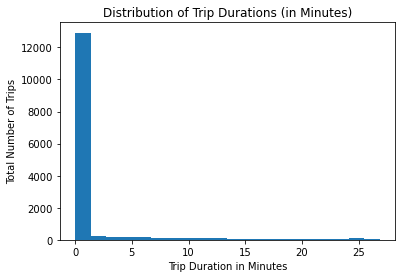

In [21]:
distr_duration = df_Trips['duration']
value_counts = distr_duration.value_counts()

plt.hist(value_counts / 60, bins = 20)

plt.title('Distribution of Trip Durations (in Minutes)')
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Total Number of Trips')
plt.show()

This reveals that 75% of all trips take less than 18 minutes. The histogram presents a very high density of durations in the range of single minutes. In contrast to that, there are very few trips which lasted multiple days, up to a maximum of 48 days. Rentals of multiple days are usually not the purpose of bike sharing, so that we tend to exclude very long durations from our dataset.

At the same time, the descriptive statistics shows that there are also trips that have a negative duration, which means that the end_time was before the start_time so that the record can be regarded as inplausible and have to be excluded.

As we want to focus in the following on the casual usage of the bike sharing and offer precise predictions and calculations, we also filter out and exclude trips that lasted multiple hours because they can be regarded as outliers. An aproriate threshold for the filtering is determined in the next code section.

In [17]:
# Describe the set of trips above one hour
df_Trips[df_Trips['duration'] > 3600]['duration'].describe()

count    2.874500e+04
mean     1.698514e+04
std      8.898371e+04
min      3.601000e+03
25%      4.471000e+03
50%      5.900000e+03
75%      9.280000e+03
max      4.178421e+06
Name: duration, dtype: float64

In [28]:
# Because the mean of long trips is rounded 5 hours, we now check the number and percentage of records above the threshold of 5
no_high = len(df_Trips[df_Trips['duration'] > 18000])
print("%d trips are above 5 hours. This makes up %f percent of the size of the raw dataset" % (no_high, no_high / len(df_Trips) * 100))

3008 trips are above 5 hours. This makes up 0.228959 percent of the size of the raw dataset


Because the mean of trips above one hour is 4:43 hours, we just round up the mean to 5 hours and take this as threshold for the exclusion of outliers. This filter would exclude 0.22% of all records. 

Now we actually want to filter out the unwanted and implausible values.
First we look for trips, who take shorter than 1 minute but still have a positive duration.

In [29]:
df_dur_short = df_Trips[(df_Trips['duration'] < 60) & (df_Trips['duration'] > 0)] 
len(df_dur_short)

0

There are no trips with a duration less than one minute. So we continue with filtering out negative duration values and applying our exclusion threshold of 5 hours to the dataset, to finally create our cleaned DataFrame df_Trips_Modified. 

In [7]:
df_Trips_Modified = df_Trips[(df_Trips['duration'] > 0) & (df_Trips['duration'] < 18000)]

In [8]:
df_Trips_Modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310760 entries, 0 to 1313773
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1310760 non-null  datetime64[ns]
 1   end_time            1310760 non-null  datetime64[ns]
 2   start_station_id    1310760 non-null  int64         
 3   end_station_id      1310760 non-null  int64         
 4   start_station_name  1310760 non-null  object        
 5   end_station_name    1310760 non-null  object        
 6   bike_id             1310760 non-null  int64         
 7   user_type           1310760 non-null  object        
 8   start_hour          1310760 non-null  int64         
 9   weekday             1310760 non-null  int64         
 10  duration            1310760 non-null  float64       
 11  month               1310760 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(3)
memory usage: 13

In [9]:
# Calculating the differnce of records between our raw and modified dataset
print("Number of exlcuded records: %d" % ((len(df_Trips) - len(df_Trips_Modified))))

Number of exlcuded records: 3014


The summary of the modified DataFrame present a good quality of the data, because we have all of our desired attributes and no null values. We had to exclude 3014 outliers and implausible records to finally create our cleaned dataset of 1310760 trips.

So finally, we write our cleaned dataset back to a new .csv file which is used for the following investigations. We ignore the index of the original records, so that we receive a new continous index on import later on, that fills the emerged gaps of the records exclusion.

In [10]:
# Write cleaned output back to csv
df_Trips_Modified.to_csv("boston_2017_cleaned_trips.csv", index = False)